---
# Title: bellabeat_case_study
# Author: Dominic Quiazon
# Date: 2023-09-26
---

# Table of Contents
1. About the Company
2. Business Tasks
3. The Data for this Analysis
4. Load Packages for Analysis
5. Install and Load Datasets for Analysis
6. Understand the Data
7. Cleaning the Data
8. Manipulate and Merge Data
9. Analyze the Data
10. Visualing the Data
11. Business Recommendations and Marketing Strategy

## About the Company
Co-founders of Bellabeat, Urška Sršen and Sando Mur, created a high-tech company that manufactures health-focused smart products. With her background in design, Sršen
developed beautifully designed technology that informs and inspires women around the world. With the aim to empower woman of awareness over their health and habits,
BellaBeat products collect data on activity, sleep, stress, and reproductive health. Since it was founded in 2013, Bellabeat has grown rapidly and quickly
positioned itself as a tech-driven wellness company for women.

The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital
marketing extensively. BellaBeat invests into a plurality of advertising streams, but the goal is to gain data-driven insights on smart device consumers and how these insights 
can be applied to BellaBeat customers. Using this data, will provide recommendations to influence BellaBeat's marketing stategy.

## Business Tasks
* What are some trends of smart device non-BellaBeat users?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

## The Data for Analysis
BellaBeat co-founder, Urška Sršen, is interested in the data of Fitbit users. 
This dataset is provided by [Mobius](https://www.kaggle.com/arashnic), called [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/).
Within the dataset, you will find that it was a distributed survey conducted by Amazon Mechnical Turk of thirty FitBit users that consented to submission of personal tracker data.
The data of the thirty respondents includes minute-level output for physical activity, heart rate, and sleep monitoring.

## Load Packages for Analysis
The "tidyverse" package compiles CRAN certified packages that are essential for the data analysis process.
The tidyverse includes a variety of packages such as ggplot2, dplyr, readr, tidyr, and many more.The "janitor" package is used for data cleaning and "lubridate" package for date formatting. Lastly, ggplot2 enables the creation of comprehensive graphs.

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(janitor)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Install and Load Datasets for Analysis

In [2]:
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set

## Understand the Data
The following functions will display the first 6 rows of each dataset to familiarize users with the data to be analyzed along with the variable names.

In [3]:
head(daily_activity)
head(daily_steps)
head(daily_sleep)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


## Cleaning the data

In [4]:
activity <- daily_activity %>%
  rename(date = ActivityDate) %>% 
  mutate(date = as_date(date, format= "%m/%d/%Y"))

steps <- daily_steps %>% 
  rename(date = ActivityDay) %>% 
  mutate(date = as_date(date, format= "%m/%d/%Y"))

sleep <- daily_sleep %>% 
  rename(date = SleepDay) %>% 
  mutate(date = as_date(date, format= "%m/%d/%Y %I:%M:%S %p"))

activity <- clean_names(activity)
steps <- clean_names(steps)
sleep <- clean_names(sleep)

In [5]:
head(activity)
head(steps)
head(sleep)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,step_total
<dbl>,<date>,<dbl>
1503960366,2016-04-12,13162
1503960366,2016-04-13,10735
1503960366,2016-04-14,10460
1503960366,2016-04-15,9762
1503960366,2016-04-16,12669
1503960366,2016-04-17,9705


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


## Manipulate and Merge Data

The aim of merging all the datasets is to have one comprehensive dataframe detailing the data of FitBit users. Since steps and calories data are listed within the "dailyActivity" dataframe, it is only needed to merge the sleep and activity dataframes.

In [6]:
merged_data <- merge(x=activity, y=sleep, by=c("id", "date"))

Now that the dateframes have been successfully merged, the data can now be viewed together.

In [7]:
head(merged_data)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


## Analyze the Data
Summary statistics are generated from this analysis, revealing the mean, max, and min of the specified variables across all  survey participants. 


The mean of total steps reveals that on average, the repsondents are taking at least 8514.14 steps within the 30 day period of smart device data being recorded. Given the amount of steps taken on average, the average calories burned each day is 2397.574, which is above the recommended amount of 2000 according to the [Cleveland Clinic](https://health.clevelandclinic.org/calories-burned-in-a-day/). Further, the mean of minutes asleep is 419.4673 minutes. As stated by Dr. Ramiz Fargo in an [Insider](https://www.insider.com/guides/health/how-many-calories-do-you-burn-from-sleeping#:~:text=You%20burn%20about%2050%20calories,before%20bed%2C%20and%20exercising%20regularly.) article, you burn about 50 calories per hour of sleep. Given that figure, the respondents are burning about 349.56 calories each night asleep, which is about 14.58% of the calories burned in a  day.

In [8]:
merged_data %>% 
  summarize(mean_totalsteps = mean(total_steps),
            max_totalsteps = max(total_steps),
            min_totalsteps = min(total_steps),
            mean_calories = mean(calories),
            max_calories = max(calories),
            min_calories = min(calories),
            mean_sleep_min = mean(total_minutes_asleep),
            max_sleep_min = max(total_minutes_asleep),
            min_sleep_min = min(total_minutes_asleep),
            mean_min_in_bed = mean(total_time_in_bed),
            max_min_in_bed = max(total_time_in_bed),
            min_min_in_bed = min(total_time_in_bed))

mean_totalsteps,max_totalsteps,min_totalsteps,mean_calories,max_calories,min_calories,mean_sleep_min,max_sleep_min,min_sleep_min,mean_min_in_bed,max_min_in_bed,min_min_in_bed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8541.14,22770,17,2397.574,4900,257,419.4673,796,58,458.6392,961,61


These values parallel the activities BellaBeat aims its focus on through the products the company offers. However, other recorded variables reveal what BellaBeat can target in their marketing strategy.

It must be emphasized that non-BellaBeat smart devices already track calories, steps, sleep, and a plethora of other variables. More importantly, given that BellaBeat's target audience is to "empower women of awareness over their health and habits," variables that improve female consumers awareness over their health should be highlighted.

Variables include:
* very_active_minutes
* sedentary_minutes

In [9]:
merged_data %>% 
  summarize(mean_very_active_minutes = mean(very_active_minutes),
            max_very_active_minutes = max(very_active_minutes),
            min_very_active_minutes = min(very_active_minutes),
            mean_sedentary_minutes = mean(sedentary_minutes),
            max_sedentary_minutes = max(sedentary_minutes),
            min_sedentary_minutes = min(sedentary_minutes))

mean_very_active_minutes,max_very_active_minutes,min_very_active_minutes,mean_sedentary_minutes,max_sedentary_minutes,min_sedentary_minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25.18886,210,0,712.1695,1265,0


With the values returned above, it can be assumed that the mean of 25.19 very_active_minutes should be the target for BellaBeat consumers within the BellaBeat app. 

Additionally, the mean of sedentary_minutes is 712.17, which is about 11.87 hours. BellaBeat can advertise the ability to track this variable, and enforce the creation of reminder alerts to reduce a user's sedentary_minutes.

Highlighing these two variables can promote a healthy lifestyle for BellaBeat's target audience. 

The following functions will reveal the count of participants within each specified dataset and to better understand the participants. Additionally, knowledge upon the count of participants in the survey will enable better visibility over the data being analyed.

In [10]:
n_distinct(activity$id)
n_distinct(steps$id)
n_distinct(sleep$id)

[1] 33

[1] 33

[1] 24

By doing so, there are actually 33 participants in total for the study given the results returned in the activity and steps datasets, yet only 24 participants were recorded in the sleep dataset. It can be assumed that the smart device users within the sleep dataset were those who wore their FitBit while sleeping, leading to only 24 participants being recorded. 

## Visualizing the Data
The first step to understanding the newly formed dataframe, "merged_data," is by gaining an understanding of the relationship between total_steps and calories. In effect, this reveals how closely correlated these variables are and how in tandem, as steps increase, calories burned will increase as well.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


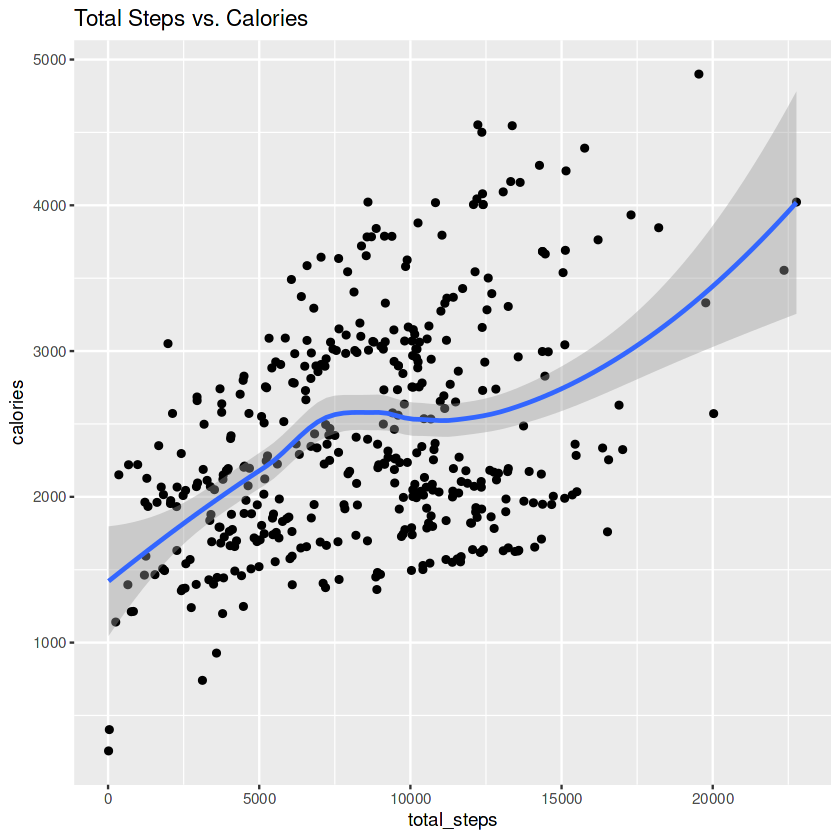

In [11]:
ggplot(data = merged_data, aes(x = total_steps, y = calories)) + 
  geom_point() + 
  geom_smooth() + 
  labs(title = "Total Steps vs. Calories")

The following correlation formula will reveal how closely associated these variables are.

In [12]:
merged_data %>%
  summarize(cor(total_steps, calories))

"cor(total_steps, calories)"
<dbl>
0.4119959


As computed, the correlation between the variables "total_steps" and "calories" is 0.4119949. Given this value, it is obvious that these variables are closely correlated due to the follow rule:
* More Correlated = Closer to 1
* Less Correlated = Closer to -1

The second step is to reveal the negative correlation between sedentary minutes and very active minutes. In effect, the analysis and comparison of these two variables can signal to smart device users of their habits in their daily lives, allowing for headway into what new features and notifications BellaBeat can provide through its marketing campaign.

The following function will compare very_active_minutes and sendentary_minutes.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


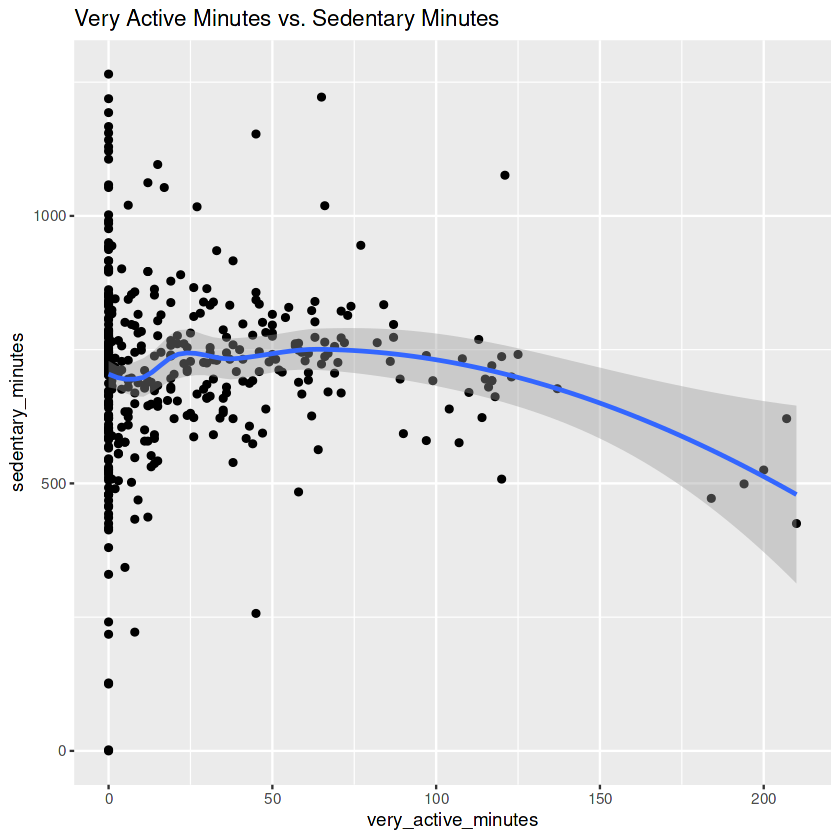

In [13]:
ggplot(data = merged_data, aes(x = very_active_minutes, y = sedentary_minutes)) + 
  geom_point() + 
  geom_smooth() + 
  labs(title = "Very Active Minutes vs. Sedentary Minutes")

As one can infer, it is apparrent that these two variables are not correlated, meaning as very active minutes increases, sedentary minutes decreases. Smart Device users can be given a notification alerting them of their sedentary time with the aim to promote their time being active.

Further asserting this claim, see below correlation between the two variables in which being -0.0169296.

In [14]:
merged_data %>%
  summarize(cor(very_active_minutes, sedentary_minutes))

"cor(very_active_minutes, sedentary_minutes)"
<dbl>
-0.0169296


The third step is visualize sleeping data with the two varaibles "total_minutes_asleep" vs. "total_time_in_bed."

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


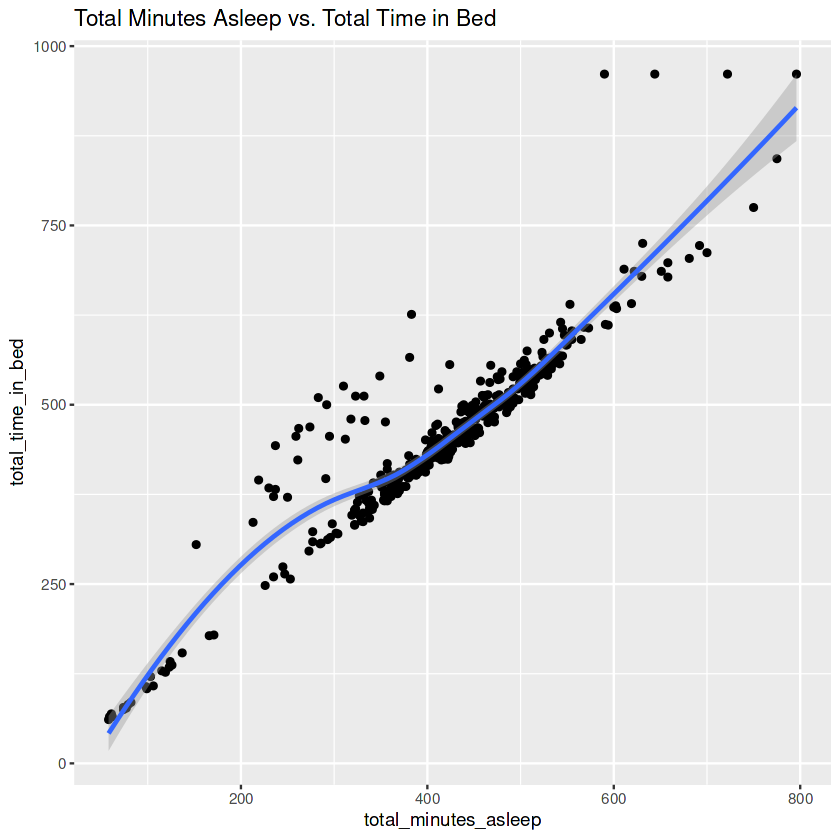

In [15]:
ggplot(data = merged_data, aes(x = total_minutes_asleep, y = total_time_in_bed)) + 
  geom_point() + 
  geom_smooth() + 
  labs(title = "Total Minutes Asleep vs. Total Time in Bed")

* mean_sleep_min = 419.4673
* mean_min_in_bed = 458.6392

With the visualization, one can infer that minutes in bed and minutes asleep are closely related. However, given the mean values computed earlier when analyzing the data, it must be emphasized that these FitBit users are spending more time in bed while not being asleep. The difference between these two values can and will add up as a year progresses. BellaBeat can target these individuals that obtain a significant difference between these two variables and provide notification of the "losses in activity minutes" or a "time spent asleep vs. time spent in bed" chart to provide better user insight of their habits. 

In [16]:
merged_data %>%
  summarize(cor(total_minutes_asleep, total_time_in_bed))

"cor(total_minutes_asleep, total_time_in_bed)"
<dbl>
0.9304575


To further assert this evidence, the correlation funciton above returned an almost perfect correlation score of 0.9304575.

## Business Recommendations and Marketing Strategy

As smart device company, BellaBeat aims to empower women to live a healthy lifestyle by enabling awareness over health and habits by summarizing data related to activity, sleep,stress and reproductive health. However, given the datasets provided of [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/), activity (calories and steps) and sleep data were the focus of this analysis, which enabled the targeting of recommendations for marketing strategies to be on the BellaBeat app itself.

![BellaBeat App](https://cdn.shopify.com/s/files/1/0978/3876/files/Bellabeat_App_3_windows_grande.jpg?v=1481730228)

#### Business Recommendations
With the analysis conducted, there was a high correlation between total steps and calories burned within a given period. The correlation between the two variables can offer insight on how habits of movement throughout the day can enable weight-loss with targets set for a given time period, which is a service BellaBeat can offer. 

The variables of very active minutes and sedentary minutes as well were key for intepretation, which resulted in a obvious lack of correlation. Due to this, allows for the conclusion that as very active minutes increases, sedentary minutes decreases, meaning smart device users should be alerted for the hours or minutes exerted in these activites.

Lastly, the highest correlation among all variables was between total minutes asleep and total minutes in bed. A considerable difference can total by year-end between these two variables, which in turn, emphasizing the need to alert smart device users of this difference in time that can be allocated to time for healthier habits.

#### Marketing Strategy
The Marketing Strategy presented bellow concern the BellaBeat App and what it can promote its advertisements.

Target Audience:
The target audience, given BellaBeat's company focus, is women who aim to improve awareness over their health and habits.

Possible Actions:
* Integrate targets for steps-per-day then include a chart for "Projected Calories Burned" as step targets are increased or decreased within the BellaBeat App.
* Include alerts or notifications of habits concerning very active minutes and sedentary minutes in column chart form and within a graph to represent trends. This will enable clear oversight over what BellaBeat promotes in empowering women over their health and habits.
* Improve Sleep and Sleep Habits:
  + Improve Sleep: include a reminders within the BellaBeat app for target times to sleep 
  + Sleep Habits:  target individuals that obtain a significant difference between these two variables and provide notification of the "losses in activity minutes" or a "time spent asleep vs. time spent in bed" chart to provide better user insight of their habits
 
#### Final Insights
The data in all included a small sample size. If given a larger sample, more conclusive results could be generated. Additionally, it would have been helpful if the data pertained solely to BellaBeat consumers, allowing for the analysis to be fully catered to these type of smart device users. Lastly, the lack of consistency of sample size in all datasets was concerning, drawing the notion that the data was incomplete in some circumstance and resulting in data points not being included in the analysis.

## Conclusion
Hi Everyone,
Whoever may view this, I hope it can provide insight on your next analysis. Please comment or ask questions and also upvote as well!